<a href="https://colab.research.google.com/github/EunjinAn/M6/blob/main/M6_Ex02_bike_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing and visualizing big data using Polars DataFrame

### We used the dataset, 'Bicycle Accidents in Great Britain' (1979 to 2018).

- Accidents.csv (72.28MB)
- Bikers.csv (29.38MB)


### 01. Data preprocessing

In [1]:
# installing 
!pip install polars --q
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 77.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing the necessary lib
import polars as pl
# EDA
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [12]:
df_acc = pl.read_csv('Accidents.csv')

In [9]:
df_bike = pl.read_csv('Bikers.csv')

In [10]:
df_bike.head()

Accident_Index,Gender,Severity,Age_Grp
str,str,str,str
"""197901A1SEE71""","""Male""","""Serious""","""36 to 45"""
"""197901A2JDW40""","""Male""","""Slight""","""46 to 55"""
"""197901A4IJV90""","""Male""","""Slight""","""46 to 55"""
"""197901A4NIE33""","""Male""","""Slight""","""36 to 45"""
"""197901A4SKO47""","""Male""","""Slight""","""46 to 55"""


In [13]:
df_acc.head()

Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
str,i64,i64,str,str,f64,str,str,str,str,str
"""197901A1SEE71""",2,1,"""1979-01-01""","""18:20""",50.0,"""Snow""","""Unknown""","""Monday""","""Dual carriagew…","""Darkness light…"
"""197901A2JDW40""",1,1,"""1979-02-01""","""09:15""",30.0,"""Snow""","""Unknown""","""Tuesday""","""Unknown""","""Daylight"""
"""197901A4IJV90""",2,1,"""1979-04-01""","""08:45""",30.0,"""Snow""","""Unknown""","""Thursday""","""Unknown""","""Daylight"""
"""197901A4NIE33""",2,1,"""1979-04-01""","""13:40""",30.0,"""Wet""","""Unknown""","""Thursday""","""Unknown""","""Daylight"""
"""197901A4SKO47""",2,1,"""1979-04-01""","""18:50""",30.0,"""Wet""","""Unknown""","""Thursday""","""Unknown""","""Darkness light…"


In [14]:
rowCount = df_acc.shape[0]
print("Total number of rows in the df_acc:", rowCount)

Total number of rows in the df_acc: 827861


In [11]:
rowCount_bike = df_bike.shape[0]
print("Total number of rows in the df_bike:", rowCount_bike)

Total number of rows in the df_bike: 827871


### 02. Data inner join

In [15]:
# inner join with two files, df and df_bike
df_total = df_acc.join(df_bike, on="Accident_Index", how="inner")
print(df_total)

shape: (827861, 14)
┌────────────┬────────────┬────────────┬───────────┬───┬────────────┬────────┬──────────┬──────────┐
│ Accident_I ┆ Number_of_ ┆ Number_of_ ┆ Date      ┆ … ┆ Light_cond ┆ Gender ┆ Severity ┆ Age_Grp  │
│ ndex       ┆ Vehicles   ┆ Casualties ┆ ---       ┆   ┆ itions     ┆ ---    ┆ ---      ┆ ---      │
│ ---        ┆ ---        ┆ ---        ┆ str       ┆   ┆ ---        ┆ str    ┆ str      ┆ str      │
│ str        ┆ i64        ┆ i64        ┆           ┆   ┆ str        ┆        ┆          ┆          │
╞════════════╪════════════╪════════════╪═══════════╪═══╪════════════╪════════╪══════════╪══════════╡
│ 197901A1SE ┆ 2          ┆ 1          ┆ 1979-01-0 ┆ … ┆ Darkness   ┆ Male   ┆ Serious  ┆ 36 to 45 │
│ E71        ┆            ┆            ┆ 1         ┆   ┆ lights lit ┆        ┆          ┆          │
│ 197901A2JD ┆ 1          ┆ 1          ┆ 1979-02-0 ┆ … ┆ Daylight   ┆ Male   ┆ Slight   ┆ 46 to 55 │
│ W40        ┆            ┆            ┆ 1         ┆   ┆            ┆  

In [16]:
# drop the nan data
null_count_df = df_total.null_count()
print(null_count_df)

shape: (1, 14)
┌────────────┬──────────────┬──────────────┬──────┬───┬──────────────┬────────┬──────────┬─────────┐
│ Accident_I ┆ Number_of_Ve ┆ Number_of_Ca ┆ Date ┆ … ┆ Light_condit ┆ Gender ┆ Severity ┆ Age_Grp │
│ ndex       ┆ hicles       ┆ sualties     ┆ ---  ┆   ┆ ions         ┆ ---    ┆ ---      ┆ ---     │
│ ---        ┆ ---          ┆ ---          ┆ u32  ┆   ┆ ---          ┆ u32    ┆ u32      ┆ u32     │
│ u32        ┆ u32          ┆ u32          ┆      ┆   ┆ u32          ┆        ┆          ┆         │
╞════════════╪══════════════╪══════════════╪══════╪═══╪══════════════╪════════╪══════════╪═════════╡
│ 0          ┆ 0            ┆ 0            ┆ 0    ┆ … ┆ 0            ┆ 0      ┆ 0        ┆ 0       │
└────────────┴──────────────┴──────────────┴──────┴───┴──────────────┴────────┴──────────┴─────────┘


In [17]:
df_total = df_total.drop_nulls()

In [18]:
# check!
null_count_df = df_total.null_count()
print(null_count_df)

shape: (1, 14)
┌────────────┬──────────────┬──────────────┬──────┬───┬──────────────┬────────┬──────────┬─────────┐
│ Accident_I ┆ Number_of_Ve ┆ Number_of_Ca ┆ Date ┆ … ┆ Light_condit ┆ Gender ┆ Severity ┆ Age_Grp │
│ ndex       ┆ hicles       ┆ sualties     ┆ ---  ┆   ┆ ions         ┆ ---    ┆ ---      ┆ ---     │
│ ---        ┆ ---          ┆ ---          ┆ u32  ┆   ┆ ---          ┆ u32    ┆ u32      ┆ u32     │
│ u32        ┆ u32          ┆ u32          ┆      ┆   ┆ u32          ┆        ┆          ┆         │
╞════════════╪══════════════╪══════════════╪══════╪═══╪══════════════╪════════╪══════════╪═════════╡
│ 0          ┆ 0            ┆ 0            ┆ 0    ┆ … ┆ 0            ┆ 0      ┆ 0        ┆ 0       │
└────────────┴──────────────┴──────────────┴──────┴───┴──────────────┴────────┴──────────┴─────────┘


In [19]:
df_total.columns

['Accident_Index',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Time',
 'Speed_limit',
 'Road_conditions',
 'Weather_conditions',
 'Day',
 'Road_type',
 'Light_conditions',
 'Gender',
 'Severity',
 'Age_Grp']

In [20]:
# preprocessed data
df_total.head()

Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
str,i64,i64,str,str,f64,str,str,str,str,str,str,str,str
"""197901A1SEE71""",2,1,"""1979-01-01""","""18:20""",50.0,"""Snow""","""Unknown""","""Monday""","""Dual carriagew…","""Darkness light…","""Male""","""Serious""","""36 to 45"""
"""197901A2JDW40""",1,1,"""1979-02-01""","""09:15""",30.0,"""Snow""","""Unknown""","""Tuesday""","""Unknown""","""Daylight""","""Male""","""Slight""","""46 to 55"""
"""197901A4IJV90""",2,1,"""1979-04-01""","""08:45""",30.0,"""Snow""","""Unknown""","""Thursday""","""Unknown""","""Daylight""","""Male""","""Slight""","""46 to 55"""
"""197901A4NIE33""",2,1,"""1979-04-01""","""13:40""",30.0,"""Wet""","""Unknown""","""Thursday""","""Unknown""","""Daylight""","""Male""","""Slight""","""36 to 45"""
"""197901A4SKO47""",2,1,"""1979-04-01""","""18:50""",30.0,"""Wet""","""Unknown""","""Thursday""","""Unknown""","""Darkness light…","""Male""","""Slight""","""46 to 55"""


### 03. Data unique values check.

In [21]:
uniqueRoad_conditions = df_total['Road_conditions'].unique()
print("Number of unique values in the 'Road_conditions' column:", uniqueRoad_conditions)

Number of unique values in the 'Road_conditions' column: shape: (6,)
Series: 'Road_conditions' [str]
[
	"Wet"
	"Snow"
	"Missing Data"
	"Dry"
	"Frost"
	"Flood"
]


In [22]:
# Weather_conditions
unique_wconditions = df_total['Weather_conditions'].unique()
print("Number of unique values in the 'Weather_conditions' column:", unique_wconditions)

Number of unique values in the 'Weather_conditions' column: shape: (10,)
Series: 'Weather_conditions' [str]
[
	"Rain"
	"Snow"
	"Snow and windy…
	"Clear and wind…
	"Unknown"
	"Clear"
	"Fog"
	"Other"
	"Rain and windy…
	"Missing data"
]


In [23]:
# Light_conditions
unique_Lconditions = df_total['Light_conditions'].unique()
print("Number of unique values in the 'Light_conditions' column:", unique_Lconditions)

Number of unique values in the 'Light_conditions' column: shape: (3,)
Series: 'Light_conditions' [str]
[
	"Darkness no li…
	"Daylight"
	"Darkness light…
]


In [24]:
unique_age = df_total['Age_Grp'].unique()
print("Number of unique values in the 'Age_Grp' column:", unique_age)

Number of unique values in the 'Age_Grp' column: shape: (9,)
Series: 'Age_Grp' [str]
[
	"46 to 55"
	"36 to 45"
	"66 to 75"
	"26 to 35"
	"56 to 65"
	"6 to 10"
	"21 to 25"
	"11 to 15"
	"16 to 20"
]


### 04. Aggregate the data

We use some functions such as filter(), select(), groupby(), mean, median etc.

We found out the accident by ['Speed_limit',
  'Road_conditions',
  'Weather_conditions',
  'Road_type',
  'Light_conditions',
  'Gender',
  'Age_Grp']



In [25]:
# Unexpectedly, we found that most accidents occur when the speed is 30.
Accident_by_Speedlimit = df_total.groupby('Speed_limit').agg(pl.col('Accident_Index').count().alias('the number of accident by Speedlimit')).sort(by='the number of accident by Speedlimit', reverse=True).head(5)
Accident_by_Speedlimit

<ipython-input-25-cea5d08f46cb>:2: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Speedlimit = df_total.groupby('Speed_limit').agg(pl.col('Accident_Index').count().alias('the number of accident by Speedlimit')).sort(by='the number of accident by Speedlimit', reverse=True).head(5)


Speed_limit,the number of accident by Speedlimit
f64,u32
30.0,686784
60.0,58557
40.0,53337
70.0,11363
20.0,10836


In [26]:
Accident_by_Road_conditions = df_total.groupby('Road_conditions').agg(pl.col('Accident_Index').count().alias('the number of accident by Road_conditions')).sort(by='the number of accident by Road_conditions', reverse=True).head(5)
Accident_by_Road_conditions

<ipython-input-26-fb0708a9e2ff>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Road_conditions = df_total.groupby('Road_conditions').agg(pl.col('Accident_Index').count().alias('the number of accident by Road_conditions')).sort(by='the number of accident by Road_conditions', reverse=True).head(5)


Road_conditions,the number of accident by Road_conditions
str,u32
"""Dry""",633936
"""Wet""",184279
"""Frost""",6020
"""Snow""",1710
"""Missing Data""",1648


In [27]:
Accident_by_Weather_conditions = df_total.groupby('Weather_conditions').agg(pl.col('Accident_Index').count().alias('the number of accident by Weather_conditions')).sort(by='the number of accident by Weather_conditions', reverse=True).head(5)
Accident_by_Weather_conditions

<ipython-input-27-1b0d7ea32827>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Weather_conditions = df_total.groupby('Weather_conditions').agg(pl.col('Accident_Index').count().alias('the number of accident by Weather_conditions')).sort(by='the number of accident by Weather_conditions', reverse=True).head(5)


Weather_conditions,the number of accident by Weather_conditions
str,u32
"""Clear""",683162
"""Rain""",82007
"""Unknown""",24081
"""Clear and wind…",11891
"""Other""",11820


In [28]:
Accident_by_Road_type = df_total.groupby('Road_type').agg(pl.col('Accident_Index').count().alias('the number of accident by Road_type')).sort(by='the number of accident by Road_type', reverse=True).head(5)
Accident_by_Road_type

<ipython-input-28-7d2f3bcc4e7b>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Road_type = df_total.groupby('Road_type').agg(pl.col('Accident_Index').count().alias('the number of accident by Road_type')).sort(by='the number of accident by Road_type', reverse=True).head(5)


Road_type,the number of accident by Road_type
str,u32
"""Single carriag…",656703
"""Roundabout""",75066
"""Dual carriagew…",59037
"""Unknown""",30647
"""One way sreet""",5562


In [29]:
Accident_by_Light_conditions = df_total.groupby('Light_conditions').agg(pl.col('Accident_Index').count().alias('the number of accident by Light_conditions')).sort(by='the number of accident by Light_conditions', reverse=True).head(5)
Accident_by_Light_conditions

<ipython-input-29-ed15f2150c57>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Light_conditions = df_total.groupby('Light_conditions').agg(pl.col('Accident_Index').count().alias('the number of accident by Light_conditions')).sort(by='the number of accident by Light_conditions', reverse=True).head(5)


Light_conditions,the number of accident by Light_conditions
str,u32
"""Daylight""",660657
"""Darkness light…",142039
"""Darkness no li…",25165


In [30]:
Accident_by_Gender = df_total.groupby('Gender').agg(pl.col('Accident_Index').count().alias('the number of accident by Gender')).sort(by='the number of accident by Gender', reverse=True).head(5)
Accident_by_Gender

<ipython-input-30-b18c0ca8d305>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Gender = df_total.groupby('Gender').agg(pl.col('Accident_Index').count().alias('the number of accident by Gender')).sort(by='the number of accident by Gender', reverse=True).head(5)


Gender,the number of accident by Gender
str,u32
"""Male""",660025
"""Female""",167717
"""Other""",119


In [31]:
Accident_by_Age_Grp = df_total.groupby('Age_Grp').agg(pl.col('Accident_Index').count().alias('the number of accident by Age_Grp')).sort(by='the number of accident by Age_Grp', reverse=True).head(10)
Accident_by_Age_Grp

<ipython-input-31-76c413cf3744>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Age_Grp = df_total.groupby('Age_Grp').agg(pl.col('Accident_Index').count().alias('the number of accident by Age_Grp')).sort(by='the number of accident by Age_Grp', reverse=True).head(10)


Age_Grp,the number of accident by Age_Grp
str,u32
"""11 to 15""",169943
"""26 to 35""",145078
"""16 to 20""",122602
"""36 to 45""",103773
"""21 to 25""",87291
"""46 to 55""",73577
"""6 to 10""",68021
"""56 to 65""",41913
"""66 to 75""",15663


In [32]:
# Severity
Accident_by_Severity = df_total.groupby('Severity').agg(pl.col('Accident_Index').count().alias('Accident by Severity')).sort(by='Accident by Severity', reverse=True).head(5)
Accident_by_Severity

<ipython-input-32-b73c72f40e9f>:2: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_Severity = df_total.groupby('Severity').agg(pl.col('Accident_Index').count().alias('Accident by Severity')).sort(by='Accident by Severity', reverse=True).head(5)


Severity,Accident by Severity
str,u32
"""Slight""",681568
"""Serious""",139563
"""Fatal""",6730


### 05. Which age group is the most dangerous in bike accidents?

In [33]:
# let's look into the "Serious" accidents using filter.
# we found out about 30% of the serious accident is the 11 to 15 age group.
serious_df = df_total.filter((pl.col('Severity') == 'Serious') & (pl.col('Age_Grp') == "11 to 15"))
print(serious_df)


shape: (28242, 14)
┌────────────┬────────────┬────────────┬───────────┬───┬────────────┬────────┬──────────┬──────────┐
│ Accident_I ┆ Number_of_ ┆ Number_of_ ┆ Date      ┆ … ┆ Light_cond ┆ Gender ┆ Severity ┆ Age_Grp  │
│ ndex       ┆ Vehicles   ┆ Casualties ┆ ---       ┆   ┆ itions     ┆ ---    ┆ ---      ┆ ---      │
│ ---        ┆ ---        ┆ ---        ┆ str       ┆   ┆ ---        ┆ str    ┆ str      ┆ str      │
│ str        ┆ i64        ┆ i64        ┆           ┆   ┆ str        ┆        ┆          ┆          │
╞════════════╪════════════╪════════════╪═══════════╪═══╪════════════╪════════╪══════════╪══════════╡
│ 197901A7PD ┆ 2          ┆ 1          ┆ 1979-07-0 ┆ … ┆ Daylight   ┆ Male   ┆ Serious  ┆ 11 to 15 │
│ D49        ┆            ┆            ┆ 1         ┆   ┆            ┆        ┆          ┆          │
│ 197901A8HI ┆ 2          ┆ 1          ┆ 1979-08-0 ┆ … ┆ Daylight   ┆ Male   ┆ Serious  ┆ 11 to 15 │
│ D35        ┆            ┆            ┆ 1         ┆   ┆            ┆   

### 06. Analysis using date column

In [34]:
df_total = df_total.with_column(pl.col('Date').str.strptime(pl.Date, strict=False))
df_total.with_column(pl.col('Date').dt.year().alias('year')).groupby('year').agg(pl.col('Accident_Index').count())

<ipython-input-34-fb49a30af94e>:1: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  df_total = df_total.with_column(pl.col('Date').str.strptime(pl.Date, strict=False))
<ipython-input-34-fb49a30af94e>:2: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  df_total.with_column(pl.col('Date').dt.year().alias('year')).groupby('year').agg(pl.col('Accident_Index').count())


year,Accident_Index
i32,u32
2012,17440
2000,19243
1988,24626
2010,15552
1998,21472
1986,24874
2008,14557
1996,23104
1984,29451


In [35]:
df_total.with_column(pl.col('Date').dt.month().alias('month')).groupby('month').agg(pl.col('Accident_Index').count())

<ipython-input-35-2a638d57adb7>:1: DeprecationWarning: `DataFrame.with_column` has been renamed; this redirect is temporary, please use `.with_columns` instead
  df_total.with_column(pl.col('Date').dt.month().alias('month')).groupby('month').agg(pl.col('Accident_Index').count())


month,Accident_Index
u32,u32
4,66261
8,76951
12,53330
2,54672
6,78722
10,72361
3,62260
7,83299
11,67468


In [38]:
Accident_by_day_gender = df_total.groupby(['Day','Gender']).agg(pl.col('Accident_Index').count()).sort(by='Accident_Index', reverse=True)
Accident_by_day_gender

<ipython-input-38-a332099e91e0>:1: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  Accident_by_day_gender = df_total.groupby(['Day','Gender']).agg(pl.col('Accident_Index').count()).sort(by='Accident_Index', reverse=True)


Day,Gender,Accident_Index
str,str,u32
"""Wednesday""","""Male""",107911
"""Thursday""","""Male""",107775
"""Tuesday""","""Male""",107523
"""Friday""","""Male""",105446
"""Monday""","""Male""",99320
"""Saturday""","""Male""",72062
"""Sunday""","""Male""",59988
"""Tuesday""","""Female""",28988
"""Wednesday""","""Female""",28825


### 07. EDA(Visualization)

We tried to make various charts with analyzed data. 

<BarContainer object of 5 artists>

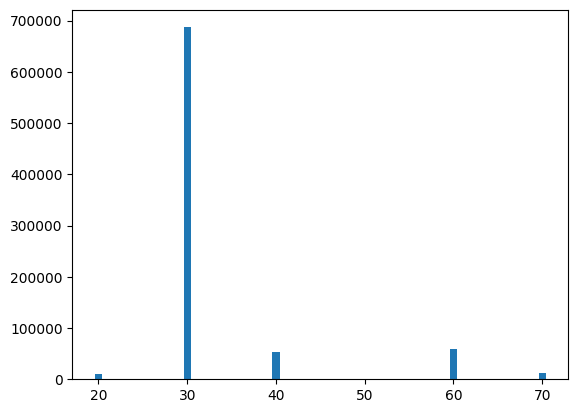

In [39]:
import matplotlib.pyplot as plt
plt.bar(Accident_by_Speedlimit['Speed_limit'],Accident_by_Speedlimit['the number of accident by Speedlimit'])

In [40]:
px.pie(Accident_by_Speedlimit,                                   # Polars DataFrame
       names = Accident_by_Speedlimit.select('Speed_limit').to_series(),
       values = Accident_by_Speedlimit.select('the number of accident by Speedlimit').to_series(), 
       hover_name = Accident_by_Speedlimit.select('Speed_limit').to_series(),
       color_discrete_sequence= px.colors.sequential.Plasma_r)

In [41]:
df = Accident_by_Road_conditions
px.line(df.to_pandas(),               # covert to Pandas DataFrame
        x = 'Road_conditions', 
        y = 'the number of accident by Road_conditions'
)

<BarContainer object of 21 artists>

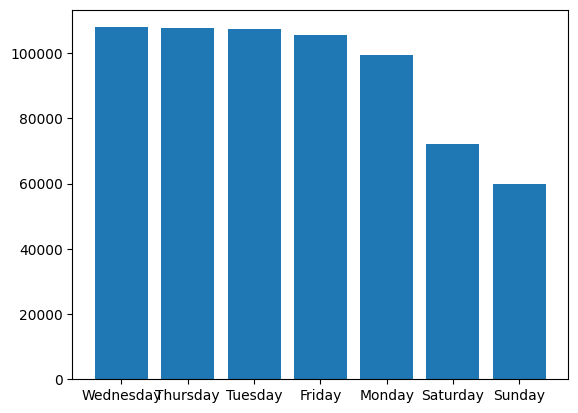

In [44]:
df = Accident_by_day_gender

plt.bar(df['Day'], df['Accident_Index'])

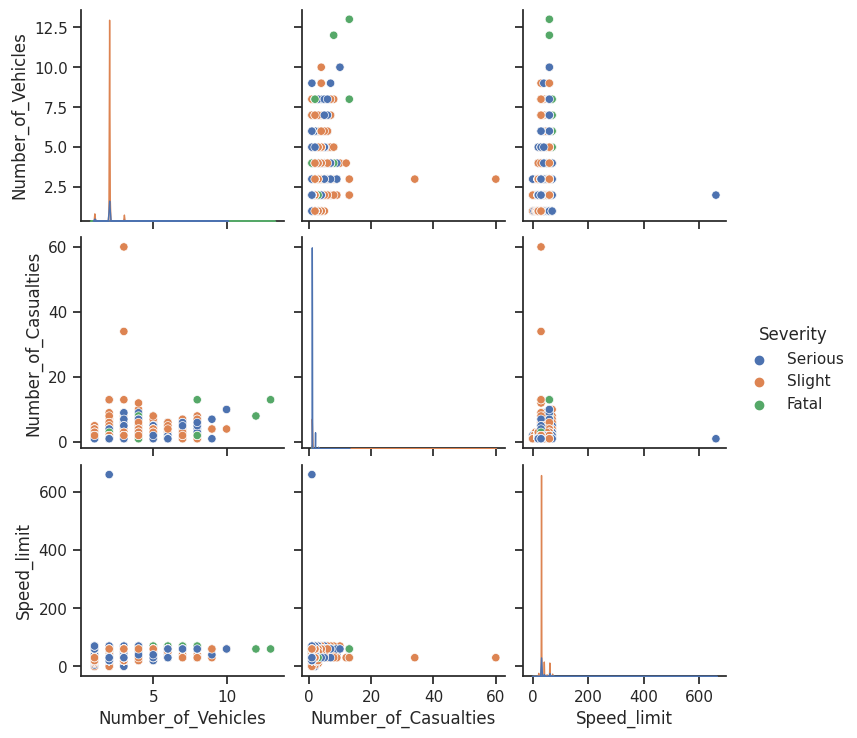

In [48]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_total.to_pandas(), hue='Severity')
